In [1]:
from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import PlayerCareerStats, PlayerGameLog, CommonPlayerInfo, ShotChartDetail
from nba_api.live.nba.endpoints import scoreboard
from nba_api.stats.endpoints import leaguedashplayerstats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time

# Exploration des performances individuelles

In [2]:
def get_data_frame(player_full_name,season):
    player_id = players.find_players_by_full_name(player_full_name)[0]["id"]
    time.sleep(1)
    data_player = PlayerGameLog(player_id, season=season).get_data_frames()[0]
    return data_player, player_id


In [3]:
df, player_id = get_data_frame("Stephen Curry", "2022-23")


In [ ]:
def get_season_player(player_id):

In [5]:
time.sleep(2)
df = PlayerCareerStats(player_id=player_id).get_data_frames()[0]

In [11]:
season = df["SEASON_ID"].to_list()
season

['2009-10',
 '2010-11',
 '2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16',
 '2016-17',
 '2017-18',
 '2018-19',
 '2019-20',
 '2020-21',
 '2021-22',
 '2022-23',
 '2023-24',
 '2024-25']

In [12]:
def get_player_season(player_id):
    df = PlayerCareerStats(player_id=player_id).get_data_frames()[0]
    season = df["SEASON_ID"].to_list()
    return season


In [32]:
df_pts_reb_pas = round(df[["PTS","REB","AST"]].mean().to_frame().transpose(),1)
df_pts_reb_pas


,PTS,REB,AST
0,29.4,6.1,6.3


In [33]:
def player_avg_stats(player_full_name,season):
    df = get_data_frame(player_full_name,season)
    df_avg = round(df[["PTS","REB","AST"]].mean().to_frame().transpose(),1)
    avg_pts = df_avg["PTS"]
    avg_reb = df_avg["REB"]
    avg_ast = df_avg["AST"]
    return avg_pts, avg_reb, avg_ast




In [56]:
def mean_win_loss(player_full_name, season):
    df = get_data_frame(player_full_name, season)
    mean_WL = df.groupby("WL")["PTS"].mean().reset_index()
    return mean_WL

In [ ]:
mean_WL = mean_win_loss("stephen curry", "2022-23")

,WL,PTS
0,L,28.807692
1,W,29.966667


In [58]:
def barplot_WL(player_full_name, season):
    mean_WL = mean_win_loss(player_full_name, season)
    fig, ax = plt.subplots()
    ax.bar(mean_WL["WL"],mean_WL["PTS"],color="skyblue",width=0.5,align="center",edgecolor="black")
    ax.set_title("Moyenne de points lors des victoires et défaites")
    ax.set_xlabel("Win or Loss")
    ax.set_ylabel("Moyenne de points")
    return plt.show()

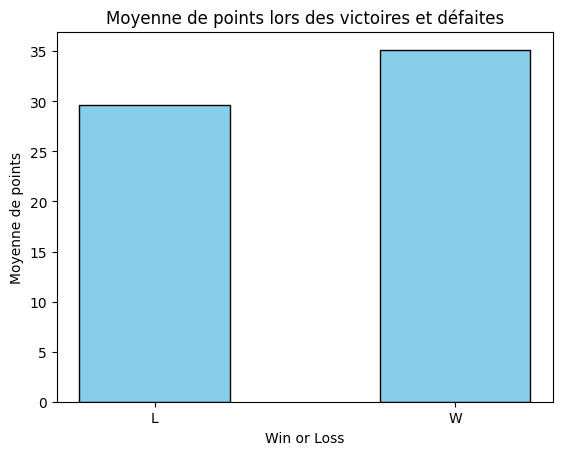

In [63]:
barplot_WL("luka doncic", "2022-23")

In [ ]:
playercareerstats()

{'id': 76001, 'full_name': 'Alaa Abdelnaby', 'first_name': 'Alaa', 'last_name': 'Abdelnaby', 'is_active': False}
